# Microsoft Studios
## Designing Data-Driven Recommendations

###### <font color='gray'>Authors: Aisha Baitemoriva-Othman, Adonis McQueen, Angela Kim, Deja Prade, James Kang</font>

## Overview

## Business Problem

----

In [1]:
## Import libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import seaborn as sns
%matplotlib inline

In [2]:
## Import datasets ##

# Aisha's datasets: Rotten Tomatoes
df_rt_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz',sep='\t')
df_rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz',sep='\t',encoding='latin1')

# Adonis's dataset: Box Office Mojo
df_gross = pd.read_csv("data/bom.movie_gross.csv.gz")

# Angela's dataset: The Numbers
mb = pd.read_csv('data/tn.movie_budgets.csv.gz')

# Deja's dataset: TMDB
movie_type = pd.read_csv('data/tmdb.movies.csv.gz')

# James's datasets: IMDB
title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
title_akas = pd.read_csv('data/imdb.title.akas.csv.gz')

----

## Angela's Data Preparation & Analysis:

In [ ]:
## Preliminary analysis
## Check datatypes and look for any missing values
display(mb.head())
display(mb.info())

**Observations and Insights:**
<ul>
<li>There are 5782 total entries with 0 missing values.
<li>The release date column is the object datatype and should be changed to the datetime datatype.
<li>The production budget, domestic gross, and worldwide gross columns are also object datatypes and should be changed to integer.
</ul>

In [ ]:
## Change release_date to datetime
mb['release_date'] = pd.to_datetime(mb['release_date'])

## Change production_budget, domestic_gross, and worldwide_gross to integer

mb['production_budget'] = mb['production_budget'].str.replace( ',' , '')
mb['production_budget'] = mb['production_budget'].str.replace( '$' , '')
mb['production_budget'] = pd.to_numeric(mb['production_budget'])

mb['domestic_gross'] = mb['domestic_gross'].str.replace( ',' , '')
mb['domestic_gross'] = mb['domestic_gross'].str.replace( '$' , '')
mb['domestic_gross'] = pd.to_numeric(mb['domestic_gross'])

mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( ',' , '')
mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( '$' , '')
mb['worldwide_gross'] = pd.to_numeric(mb['worldwide_gross'])


## Check that all changes have been correctly made
mb.info()

In [ ]:
## Remove rows with release_date before 2010 to focus on analyzing data from the most recent decade

mb = mb[(mb['release_date']) >= '2010-01-01']

display(mb.head(30))
display(mb.tail(30))

**Observations & Insights:**
<ul>
<li>There are a lot of gross values that are 0. They also tend to correlate with movies with very small production budgets.
<li>Upon investigation, these films are usually independently made and don't apply to a large corporation like Microsoft.
</ul>

In [ ]:
## Create two new columns for domestic profit and worldwide profit
## Remove rows with negative profits

mb['domestic_profit'] = (mb['domestic_gross'] - mb['production_budget'])
mb['worldwide_profit'] = (mb['worldwide_gross'] - mb['production_budget'])
mb.head(30)

**Observations & Insights:**
<ul>
<li>There are films that are box office bombs such as Dark Phoenix, The Lone Ranger, and Pirates of the Caribbean: On Strangers Tides. Their production budgets overshadowed their box office revenues.
</ul>

In [ ]:
## Sort by highest domestic profits

mb_dp = mb.sort_values(by=['domestic_profit'], ascending=False)
mb_dp.reset_index(inplace=True)

## Sort by highest worldwide profits

mb_wp = mb.sort_values(by=['worldwide_profit'], ascending=False)
mb_wp.reset_index(inplace=True)

In [ ]:
## Bar chart of Top 30 Movies with Highest Domestic Profits

fig, ax = plt.subplots(figsize=(18,10), dpi=200)

x1 = mb_dp['movie'][0:30]
y1 = mb_dp['domestic_profit'][0:30]


# Buena Vista is MAGENTA
# Universal Pictures is VIOLET
ax = sns.barplot(x=y1, y=x1,
                 palette=["#cc0099"
                          if x=='Star Wars Ep. VII: The Force Awakens'
                          or x=='Black Panther'
                          or x=='Incredibles 2'
                          or x=='The Avengers'
                          or x=='Avengers: Infinity War'
                          or x=='Beauty and the Beast'
                          or x=='Rogue One: A Star Wars Story'
                          or x=='Deadpool'
                          or x=='Star Wars Ep. VIII: The Last Jedi'
                          or x=='The Secret Life of Pets'
                          or x=='Finding Dory'
                          or x=='Captain Marvel'
                          or x=='Frozen'
                          or x=='Toy Story 3'
                          or x=='Deadpool 2'
                          or x=='Iron Man 3'
                          else '#3333cc'
                          if x=='Jurassic World'
                          or x=='Furious 7'
                          or x=='Jurassic World: Fallen Kingdom'
                          or x=='Minions'
                          or x=='Despicable Me 2'
                          else '#e0e0eb' for x in mb_dp['movie']])

ax.set_xlabel('Domestic Profits', fontsize=18, fontweight='bold', labelpad=14)
ax.set_ylabel('Movies', fontsize=18, fontweight='bold', labelpad=(-10))
ax.set_title('Top 30 Movies with Highest Domestic Profits 2010-2019', fontsize=30, fontweight='bold', pad=20)

plt.xticks(ticks=[0,100000000,200000000,300000000,400000000,500000000,600000000],
           labels=['0','100M', '200M', '300M', '400M', '500M', '600M'], fontsize=12)
plt.yticks(fontsize=10)

bv_label = mpatches.Patch(color='#cc0099', label='Buena Vista')
up_label = mpatches.Patch(color='#3333cc', label='Universal Pictures')
other_label = mpatches.Patch(color='#e0e0eb', label='Other Studios')
ax.legend(handles=[bv_label, up_label, other_label], loc='center right', prop={'size':16});

In [ ]:
## Bar chart of Top 30 Movies with Highest Worldwide Profits

fig, ax = plt.subplots(figsize=(18,10), dpi=200)

x2 = mb_wp['movie'][0:30]
y2 = mb_wp['worldwide_profit'][0:30]


# Buena Vista is MAGENTA
# Universal Pictures is VIOLET
ax = sns.barplot(x=y2, y=x2,
                 palette=["#cc0099"
                          if x=='Star Wars Ep. VII: The Force Awakens'
                          or x=='Black Panther'
                          or x=='Incredibles 2'
                          or x=='The Avengers'
                          or x=='Avengers: Infinity War'
                          or x=='Beauty and the Beast'
                          or x=='Rogue One: A Star Wars Story'
                          or x=='Deadpool'
                          or x=='Star Wars Ep. VIII: The Last Jedi'
                          or x=='The Secret Life of Pets'
                          or x=='Finding Dory'
                          or x=='Captain Marvel'
                          or x=='Frozen'
                          or x=='Toy Story 3'
                          or x=='Deadpool 2'
                          or x=='Iron Man 3'
                          or x=='Frozen'
                          or x=='Beauty and the Beast'
                          or x=='Stars Wars Ep. VIII: The Last Jedi'
                          or x=='Captain Marvel'
                          or x=='Zootopia'
                          or x=='Avengers: Age of Ultron'
                          or x=='Captain America: Civil War'
                          else '#3333cc'
                          if x=='Jurassic World'
                          or x=='Furious 7'
                          or x=='Jurassic World: Fallen Kingdom'
                          or x=='Minions'
                          or x=='Despicable Me 2'
                          or x=='The Fate of the Furious'
                          or x=='Despicable Me 3'
                          else '#e0e0eb' for x in mb_wp['movie']])

ax.set_xlabel('Worldwide Profits', fontsize=18, fontweight='bold', labelpad=14)
ax.set_ylabel('Movies', fontsize=18, fontweight='bold', labelpad=(-10))
ax.set_title('Top 30 Movies with Highest Worldwide Profits 2010-2019', fontsize=30, fontweight='bold', pad=20)

plt.xticks(ticks=[0,0.25e9,0.5e9,0.75e9,1e9,1.25e9,1.5e9,1.75e9],
           labels=['0', '0.25B', '0.5B', '0.75B', '1B', '1.25B', '1.5B', '1.75B'], fontsize=12)
plt.yticks(fontsize=10)

bv_label = mpatches.Patch(color='#cc0099', label='Buena Vista')
up_label = mpatches.Patch(color='#3333cc', label='Universal Pictures')
other_label = mpatches.Patch(color='#e0e0eb', label='Other Studios')
ax.legend(handles=[bv_label, up_label, other_label], loc='center right', prop={'size':16});

**Final Observations & Insights:**
<ul>
    <li>The 10 movies with highest domestic profits from 2010-mid2019 are <b><i>Star Wars Ep. VII: The Force Awakens, Black Panther, Jurassic World, Incredibles 2, The Avengers, Avengers: Infinity War, Beauty and the Beast, Rogue One: A Star Wars Story, The Hunger Games, and Jumanji: Welcome to the Jungle.</i></b>
    <li>The 10 movies with highest worldwide profits from 2010-mid2019 are <b><i>Avengers: Infinity War, Star Wars Ep. VII: The Force Awakens, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part II, Black Panther, Jurassic World: Fallen Kingdom, Frozen, and Beauty and the Beast.</i></b>
    <li>The most frequently occuring genres of the Top 30 films are <b><i>Sci-fi, Action, Adventure, and Animation</i></b>, with most of them having a subgenre of <b><i>Superhero.</i></b>
    <li>The majority of these films are part of the <b><i>Marvel</i></b> or <b><i>Star Wars</i></b> franchises.
    <li>There has also been a huge focus on revitalizing or reimagining classics such as <b><i>Jurassic Park, James Bond, and Jumanji.</i></b>
    <li>Many financially successful films are sequels such as <b><i>Star Wars Ep. VII, Avengers: Infinity War, Furious 7, Harry Potter and the Deathly Hallows: Parts I & II, and Incredibles 2</b></i>
</ul>

----

## Aisha's Data Preparation & Analysis:

In [ ]:
df_rt_movie_info.head(3)

In [ ]:
df_rt_movie_info.shape

In [ ]:
## Remove the month and day from the theater_date and create a new column with just the year of the release date
df_rt_movie_info['new_theater_date'] = df_rt_movie_info.theater_date.str[-4:]

In [ ]:
## Convert the values in the 'new_theater_date' column from strings to integers
df_rt_movie_info['new_theater_date'] = df_rt_movie_info['new_theater_date'].apply(pd.to_numeric)

In [ ]:
df_rt_movie_info.head(3)

**Observations & Insights**
<ul>
</ul>
<li>There are 494 out of 1560 rows that have a missing studio value

In [ ]:
df_rt_movie_info['studio'].isna().value_counts()

In [ ]:
## All the studios listed
df_rt_movie_info['studio'].value_counts().head() 

In [ ]:
df_rt_reviews.head(10)

In [ ]:
df_rt_reviews[df_rt_reviews['rating'].isna()]

In [ ]:
## Remove all rows that have a null value in the 'rating' column
df_rt_reviews = df_rt_reviews[df_rt_reviews['rating'].notna()]
df_rt_reviews.shape

In [ ]:
df_rt_reviews.loc[df_rt_reviews ['rating'] == 'T']

In [ ]:
## Split the "rating" column into two separate columns, separating them on "/" if the rating is not a letter
df_rt_reviews[['fn','sn']] = df_rt_reviews['rating'].str.split('/',expand=True)

In [ ]:
df_rt_reviews.head()

In [ ]:
## Replace the null values in the 'sn'(second number) with number 1. The row of the column 'sn' has a null value 
# only if the corresponding 'rating' column has a letter rating.
df_rt_reviews['sn'] = df_rt_reviews.sn.apply(lambda x: x if not pd.isnull(x) else 1)

In [ ]:
## Replace the letter ratings with the appropriate percentages
# The letter ratings are: A+, A, A-, B+, B, B-, C+, C, C-, D+, D, D-, F+, F, F-
# A+ gets 1, A gets 93.34, A- gets 86.68
# B+ gets 80.02, B gets 73.36, B- gets 66.7, 
# C+ gets 60.04, C gets 53.38, C- gets 46.72
# D+ gets 40.06, D gets 33.4, D- gets 26.74
# F+ gets 20.08, F gets 13.42, F- gets 6.66
df_rt_reviews['fn'] = df_rt_reviews['fn'].replace(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F+','F','F-'],[1,0.9334,0.8668,0.8002,0.7336,0.667,0.6004,0.5338,0.4672,0.4006,0.334,0.2674,0.2008,0.1342,0.666])

In [ ]:
## Delete a row with an outlier value in the 'fn' column which is giving an error 
# when trying to convert all string values into numeric values
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'N']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'R']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '1-5']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'T']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '3 1']

In [ ]:
## Convert all string values in the 'fn' and 'sn' columns into numeric values
df_rt_reviews['fn'] = df_rt_reviews['fn'].apply(pd.to_numeric)
df_rt_reviews['sn'] = df_rt_reviews['sn'].apply(pd.to_numeric)

In [ ]:
df_rt_reviews['new_rating'] = df_rt_reviews.apply(lambda row: row.fn/row.sn, axis=1)

In [ ]:
## Delete rows that have a new_rating value higher than 1
df_rt_reviews = df_rt_reviews[df_rt_reviews.new_rating <=1]

In [ ]:
df_rt_reviews.head()

In [ ]:
## Create a new dataset with only 'id' and 'new_rating' columns of the 'df_rt_reviews' dataset
# so we can merge it later on with the 'df_rt_movie_info' dataset.
new_rt_reviews = pd.DataFrame(zip(df_rt_reviews.id, df_rt_reviews.new_rating))

In [ ]:
## Rename the columns back to original names
new_rt_reviews.rename(columns={0: 'id', 1: 'rating'}, inplace=True)

In [ ]:
new_rt_reviews.head()

In [ ]:
df_rt_movie_info.head()

In [ ]:
new_rt_movie_info = pd.DataFrame(zip(df_rt_movie_info.id,
                                     df_rt_movie_info.genre,
                                     df_rt_movie_info.runtime,
                                     df_rt_movie_info.new_theater_date))

In [ ]:
new_rt_movie_info.head()

In [ ]:
# Rename the columns back to original names
new_rt_movie_info.rename(columns={0: 'id', 1: 'genres', 2: 'runtime', 3: 'release_year'}, inplace=True)

In [ ]:
new_rt_movie_info.head()

In [ ]:
# Left join the new_rt_movie_info to new_rt_reviews
merged_datasets = pd.merge(new_rt_reviews,new_rt_movie_info,on='id',how='left')

In [ ]:
merged_datasets.head()

In [ ]:
## First step in splitting the genres of each row into separate rows for each genre of each movie
## Create a list out of each genres string such as this: 'Action and Adventure|Classics|Drama'
merged_datasets['genres']=merged_datasets['genres'].str.split('|')

## Second step in splitting the genres of each row into separate rows for each genre of each movie
merged_datasets = merged_datasets.explode('genres')

# Get rid of text characters in the 'runtime' column 
merged_datasets['runtime'] = merged_datasets['runtime'].str.replace(' minutes','')

# Convert the 'runtime' column's string values into floats
merged_datasets['runtime'] = pd.to_numeric(merged_datasets['runtime'])

merged_datasets.info()

In [ ]:
## Explore movie genre trends over the years

merged_datasets['genres'].value_counts()
merged_datasets = merged_datasets[merged_datasets['release_year']>1999]
merged_datasets['release_year'].value_counts()
merged_datasets_drama = merged_datasets[merged_datasets['genres']=='Drama']
merged_datasets_comedy = merged_datasets[merged_datasets['genres']=='Comedy']
merged_datasets_action_adv= merged_datasets[merged_datasets['genres']=='Action and Adventure']
merged_datasets_animation= merged_datasets[merged_datasets['genres']=='Animation']
merged_datasets_romance= merged_datasets[merged_datasets['genres']=='Romance']

In [ ]:
## Make separate dataframes by value counts in each genre

df_drama = merged_datasets_drama.groupby('release_year')['genres'].value_counts()
df_comedy = merged_datasets_comedy.groupby('release_year')['genres'].value_counts()
df_action_adv = merged_datasets_action_adv.groupby('release_year')['genres'].value_counts()
df_animation = merged_datasets_animation.groupby('release_year')['genres'].value_counts()
df_romance = merged_datasets_romance.groupby('release_year')['genres'].value_counts()

In [ ]:
## Convert dataframes to lists

mylist_drama = df_drama.to_list()
mylist_comedy = df_comedy.to_list()
mylist_action_adv = df_action_adv.to_list()
mylist_action_adv = [528,241,504,385,598,916,607,534,566,451,435,501,516,25,0,112,131,11,366]
mylist_animation = df_animation.to_list()
mylist_animation = [85, 76, 99, 53, 160, 66, 71, 129, 189, 164, 16, 213,0,0,0, 48, 234, 39, 92]
mylist_romance = df_romance.to_list()
mylist_romance = [141,175,498,428,154,458,248,410,307,119,480,334,0,65,94,248,147,165,170]

In [ ]:
years_list = list(range(2000,2019))

In [ ]:
from matplotlib.pyplot import figure

In [ ]:
## Plot
plt.figure(figsize=(30, 15))
plt.plot(years_list, mylist_drama, marker='o',
         color='skyblue', linewidth=2, linestyle='solid', label="Drama")
plt.plot(years_list, mylist_comedy, marker='o',
         color='orange', linewidth=2, linestyle='solid', label="Comedy")
plt.plot(years_list, mylist_action_adv, marker='o',
         color='fuchsia', linewidth=2, linestyle='solid', label="Action")
plt.plot(years_list, mylist_animation, marker='o',
         color='purple', linewidth=2, linestyle='dashdot', label="Animation")
plt.plot(years_list, mylist_romance, marker='o',
         color='green', linewidth=2, linestyle='dashed', label="Romance")
plt.legend(borderpad = 2, prop={"size":20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.locator_params(axis="x", nbins=10)
plt.title("Movie Genre Trend 2000-2008", fontsize=30, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=20, fontweight='bold', labelpad=10)
plt.ylabel("Number of Movies Produced", fontsize=20, fontweight='bold', labelpad=10);

In [ ]:
merged_datasets['genres'].value_counts()

**Observations & Insights:**
<ul>
</ul>
<li>The last four genre categories are too low in numbers compared to other movie genres.
<li>We think it is best to remove them from our dataset.

In [ ]:
## Create a list of genres that are not statistically significant
not_significant_genres_list = ['Anime and Manga','Gay and Lesbian','Cult Movies','Faith and Spirituality','Television','Sports and Fitness','Documentary','Western','Special Interest']

In [ ]:
## Delete the not statistically insignificant genres from the dataset and creating a new dataset without those genres
new_merged_datasets = merged_datasets[~merged_datasets.genres.isin(not_significant_genres_list)]

In [ ]:
## Find the mean of runtime for each genre
average_runtime_per_genre = new_merged_datasets.groupby('genres', as_index=False)['runtime'].mean()

## Rename the 'runtime' column into the 'mean_runtime'
average_runtime_per_genre.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

average_runtime_per_genre

In [ ]:
# Find the mean of the ratings for each genre
average_rating_per_genre = new_merged_datasets.groupby('genres', as_index=False)['rating'].mean()

## Rename the "rating" column into the 'mean_rating'
average_rating_per_genre.rename(columns={'rating': 'mean_rating'}, inplace=True)

average_rating_per_genre

In [ ]:
## Plot
fig, ax1 = plt.subplots(figsize = (20,8))
x1 = average_rating_per_genre['genres']
y1 = average_rating_per_genre['mean_rating']
ax1.bar(x1,y1)
ax1.set_title('Average Rating per Genre', fontsize=30, fontweight='bold', pad=20)
ax1.set_xlabel('Genre', fontsize=20, fontweight='bold', labelpad=10)
ax1.set_ylabel('Average Rating', fontsize=20, fontweight='bold', labelpad=10)
plt.xticks(rotation = 45, fontsize=16)
plt.yticks(fontsize=16);

**Observations & Insights:**
<ul>
</ul>
The 4 genres that have the highest average ratings:
        <li> Romance </li>
        <li> Art House and International </li>
        <li> Drama </li>
        <li> Mystery and Suspense </li>

In [ ]:
# Create a list of the four genres with the highest rating
four_genres_list = ['Romance','Art House and International','Drama','Mystery and Suspense']

# Create a dataset with only the four genres with the highest ratings
highest_rating_genres_dataset = merged_datasets[merged_datasets.genres.isin(four_genres_list)]

highest_rating_genres_dataset['genres'].value_counts()

In [ ]:
# The mean of runtime for the four highest rated genres
highest_rating_genres_dataset['runtime'].mean()

# Standard deviation from the mean for the four highest rated genres
highest_rating_genres_dataset['runtime'].std()

# Average runtime for each of the four highest rating genres
avg_runtime_high_rating_genres = highest_rating_genres_dataset.groupby('genres', as_index=False)['runtime'].mean()

# Rename the 'runtime' column of the new dataset into the "mean_runtime" 
avg_runtime_high_rating_genres.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

avg_runtime_high_rating_genres

In [ ]:
## Plot
fig, ax2 = plt.subplots(figsize = (12,6))
x2 = avg_runtime_high_rating_genres['genres']
y2 = avg_runtime_high_rating_genres['mean_runtime']
ax2.bar(x2,y2)
ax2.set_title('Average Runtime per Genre')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Average Rating')
plt.xticks(rotation = 45);

----

## Adonis's Data Preparation & Analysis

In [ ]:
df_gross.head()

In [3]:
## Find null values
df_gross['domestic_gross'].isnull().value_counts()

False    3359
True       28
Name: domestic_gross, dtype: int64

In [4]:
df_gross['foreign_gross'].isnull().value_counts()

False    2037
True     1350
Name: foreign_gross, dtype: int64

In [5]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
## Remove commas from values & convert to numeric
df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace(',', '')
df_gross['foreign_gross'] = pd.to_numeric(df_gross['foreign_gross'])
df_gross['foreign_gross'].head() 

0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [7]:
## Remove null values from columns
df_gross.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)
df_gross.shape

(2007, 5)

In [8]:
## Verification of null value deletion
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


**Observations & Insights:**
<ul></ul>
<li>Do the studios that produce the most movies have the highest gross values?

In [9]:
## Top 10 studios with the most movies
df_gross['studio'].value_counts()[:10]

Uni.     144
Fox      134
WB       130
Sony     105
BV       104
Par.      94
LGF       87
Wein.     69
IFC       68
SPC       59
Name: studio, dtype: int64

In [10]:
x = list(df_gross['studio'].value_counts()[:10].index)
x

['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'Wein.', 'IFC', 'SPC']

In [11]:
## Top 10 studios domestic gross
dfm2 = df_gross.groupby(['studio']).domestic_gross.sum().reset_index().sort_values(by='domestic_gross', ascending=False)
d = dfm2[dfm2['studio'].isin(x)]

**Observations & Insights:**
<ul></ul>
<li>Data analysis will focus on domestic and foreign gross for titles and studios.

In [12]:
## Total gross for each film
df_gross['total_gross'] = df_gross['domestic_gross'] + df_gross['foreign_gross']
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [13]:
## Sort by domestic gross
f = df_gross.sort_values(by='domestic_gross', ascending=False)
f.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,9.367011e+08
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08
1873,Jurassic World,Uni.,652300000.0,1019.4,2015,6.523010e+08
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09


**Observations & Insights:**
<ul></ul>
<li>Some foreign gross values seem wrong for blockbuster films. Are there more?

In [14]:
## Sort df on foreign gross
g = df_gross.sort_values(by='foreign_gross', ascending=False)
g.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017,8.703000e+08
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014,1.104000e+09
1876,Minions,Uni.,336000000.0,823400000.0,2015,1.159400e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [15]:
## Check for more misreported foreign gross
g.tail(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
187,"Waiting for ""Superman""",ParV,6400000.0,9300.0,2010,6409300.0
2696,Troublemakers: The Story of Land Art,FRun,29500.0,9100.0,2016,38600.0
300,Saint John of Las Vegas,IVP,103000.0,9100.0,2010,112100.0
279,Karthik Calling Karthik,Eros,286000.0,7100.0,2010,293100.0
305,Enemies of the People,ICir,73200.0,6400.0,2010,79600.0
320,Nenette,Kino,18000.0,5400.0,2010,23400.0
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,98400.0
317,Bluebeard,Strand,33500.0,5200.0,2010,38700.0
715,Aurora,CGld,5700.0,5100.0,2011,10800.0
266,The Extra Man,Magn.,453000.0,4500.0,2010,457500.0


**Observations & Insights:**
<ul></ul>
<li>Foreign gross values for some blockbusters are misreported.
<li>Analysis will focus on domestic markets, as foreign gross values cannot be verified/trusted.

<ipython-input-38-d3932405af87>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=f.title[:10], fontsize=12)
<ipython-input-38-d3932405af87>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels=dfm3.studio[:10], fontsize=12)
<ipython-input-38-d3932405af87>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(labels=d.studio, fontsize=12)


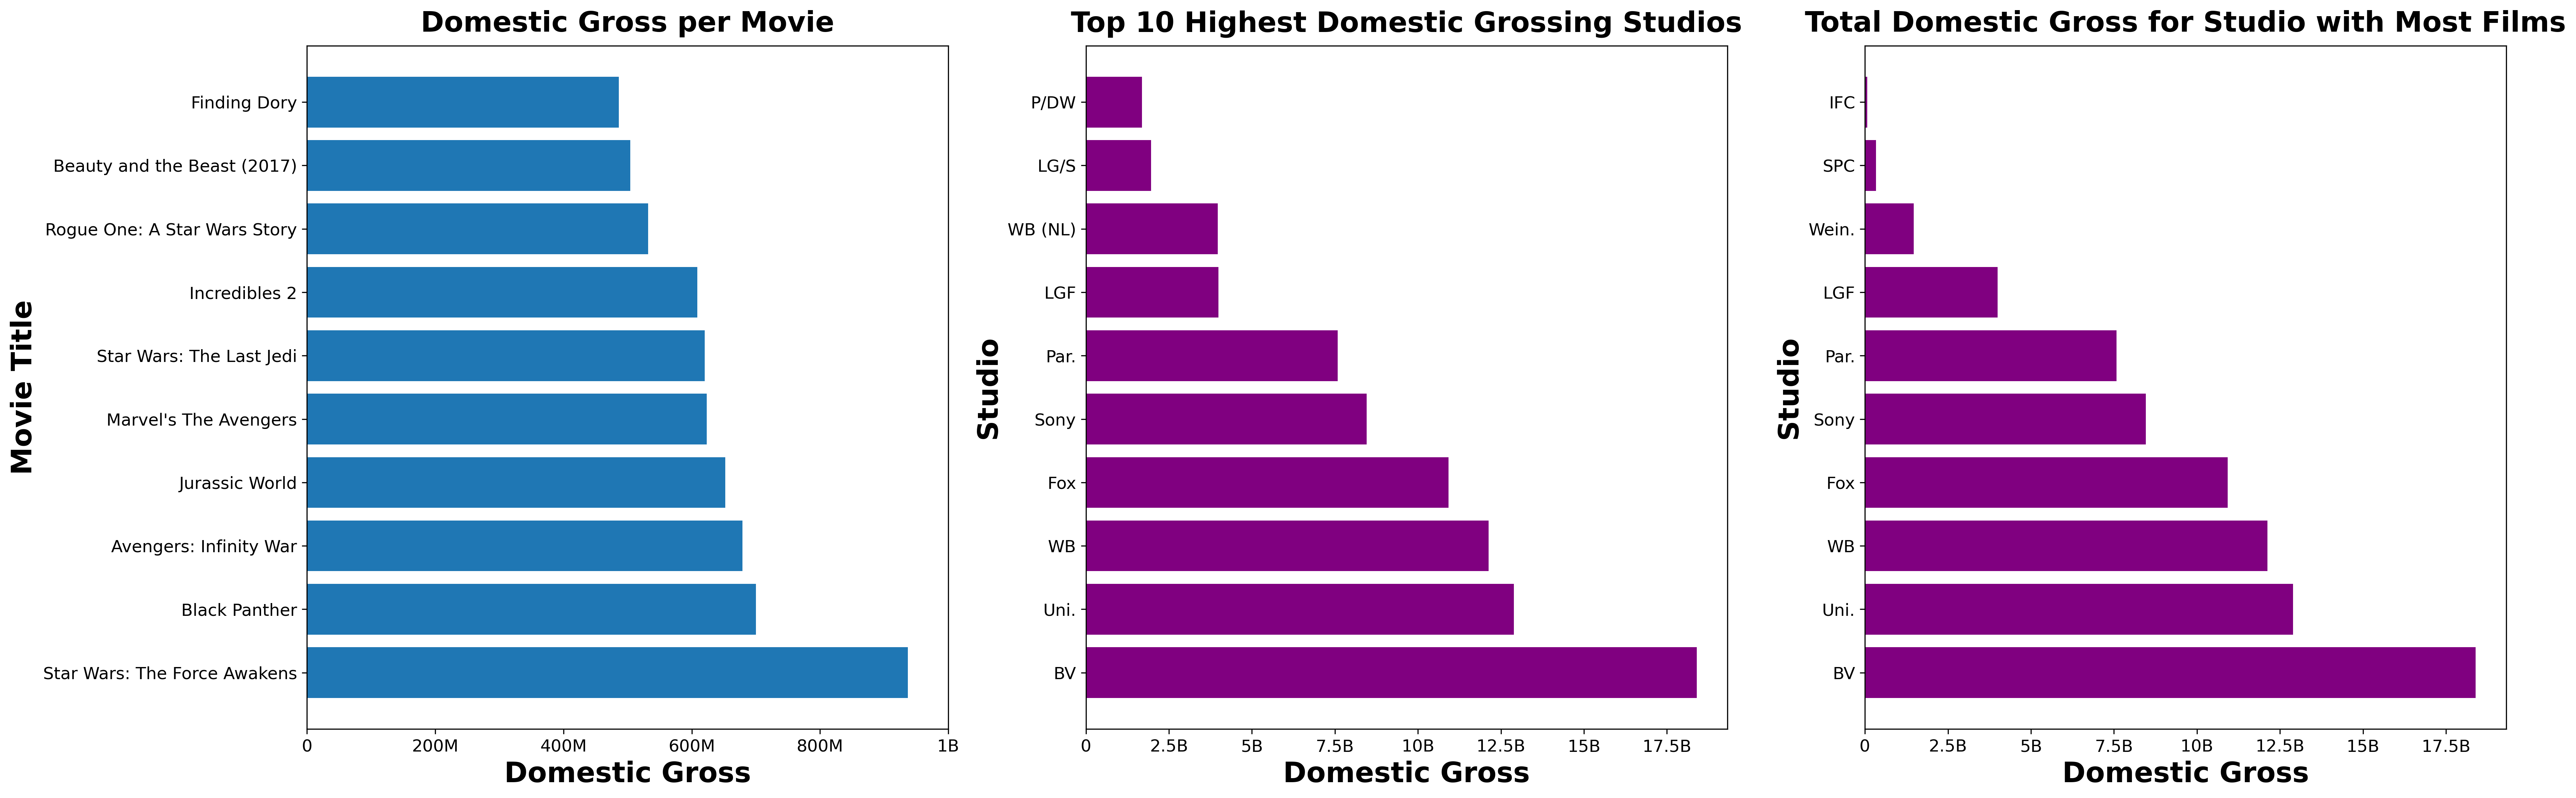

In [38]:
## Plots

# Domestic gross per title
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25,8), dpi=300)

x1 = f['title'][:10]
y1 = f['domestic_gross'][:10]
ax1.barh(x1, y1)
ax1.set_xticks([0,200000000, 400000000, 600000000, 800000000, 1000000000])
ax1.set_xticklabels(['0','200M', '400M', '600M', '800M', '1B'], fontsize=12)
ax1.set_yticklabels(labels=f.title[:10], fontsize=12)
ax1.set_xlabel("Domestic Gross", fontsize=20, fontweight='bold')
ax1.set_ylabel("Movie Title", fontsize=20, fontweight='bold')
ax1.set_title("Domestic Gross per Movie", fontsize=20, fontweight='bold', pad=10)


# Domestic gross per studio
dfm3 = df_gross.groupby(['studio']).domestic_gross.sum().reset_index().sort_values(
    by='domestic_gross', ascending=False)

x2 = dfm3.studio[:10]
y2 = dfm3.domestic_gross[:10]
ax2.barh(x2, y2, color='purple')
ax2.set_xticks([0,2500000000, 5000000000, 7500000000, 10000000000, 12500000000, 15000000000, 17500000000])
ax2.set_xticklabels(['0','2.5B', '5B', '7.5B', '10B', '12.5B', '15B', '17.5B'], fontsize=12)
ax2.set_yticklabels(labels=dfm3.studio[:10], fontsize=12)
ax2.set_xlabel('Domestic Gross', fontsize=20, fontweight='bold')
ax2.set_ylabel('Studio', fontsize=20, fontweight='bold')
ax2.set_title('Top 10 Highest Domestic Grossing Studios', fontsize=20, fontweight='bold', pad=10)

# Domestic gross for studios with most films
x = ['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'Wein.', 'IFC', 'SPC']

x3 = d['studio']
y3 = d['domestic_gross']
ax3.barh(x3, y3, color='purple')
ax3.set_xticks([0,2500000000, 5000000000, 7500000000, 10000000000, 12500000000, 15000000000, 17500000000])
ax3.set_xticklabels(['0','2.5B', '5B', '7.5B', '10B', '12.5B', '15B', '17.5B'], fontsize=12)
ax3.set_yticklabels(labels=d.studio, fontsize=12)
ax3.set_xlabel("Domestic Gross", fontsize=20, fontweight='bold')
ax3.set_ylabel("Studio", fontsize=20, fontweight='bold')
ax3.set_title('Total Domestic Gross for Studio with Most Films', fontsize=20, fontweight='bold', pad=10)

fig.tight_layout();

**Observations & Insights:**
<ul></ul>
<li>Most of these studios are subsidiaries of a parent company.
<li>Should Microsoft acquire studios for its content production?

In [ ]:
## List of unique studios. Used to create sample list for parent companies
df_gross['studio'].unique()

In [18]:
## Sample list of studios owned by parent companies
Disney = ['BV', 'Fox', 'FoxS', 'W/Dim.']
Comcast = ['Uni', 'P/DW', 'Focus']
TimeWarner = ['WB', 'WB (NL)']
Viacom = ['CBS', 'P/DW', 'Mira', 'ParV']
Sony = ['SPC', 'Sony', 'TriS']
MiniMajors = ['RAtt.', 'Rela.']

In [19]:
## Simplified DFs to calculate total domestic gross from studios
Disney_df = dfm2[dfm2['studio'].isin(Disney)]
Comcast_df = dfm2[dfm2['studio'].isin(Comcast)]
TimeWarner_df = dfm2[dfm2['studio'].isin(TimeWarner)]
Viacom_df = dfm2[dfm2['studio'].isin(Viacom)]
Sony_df = dfm2[dfm2['studio'].isin(Sony)]
Mini_df = dfm2[dfm2['studio'].isin(MiniMajors)]

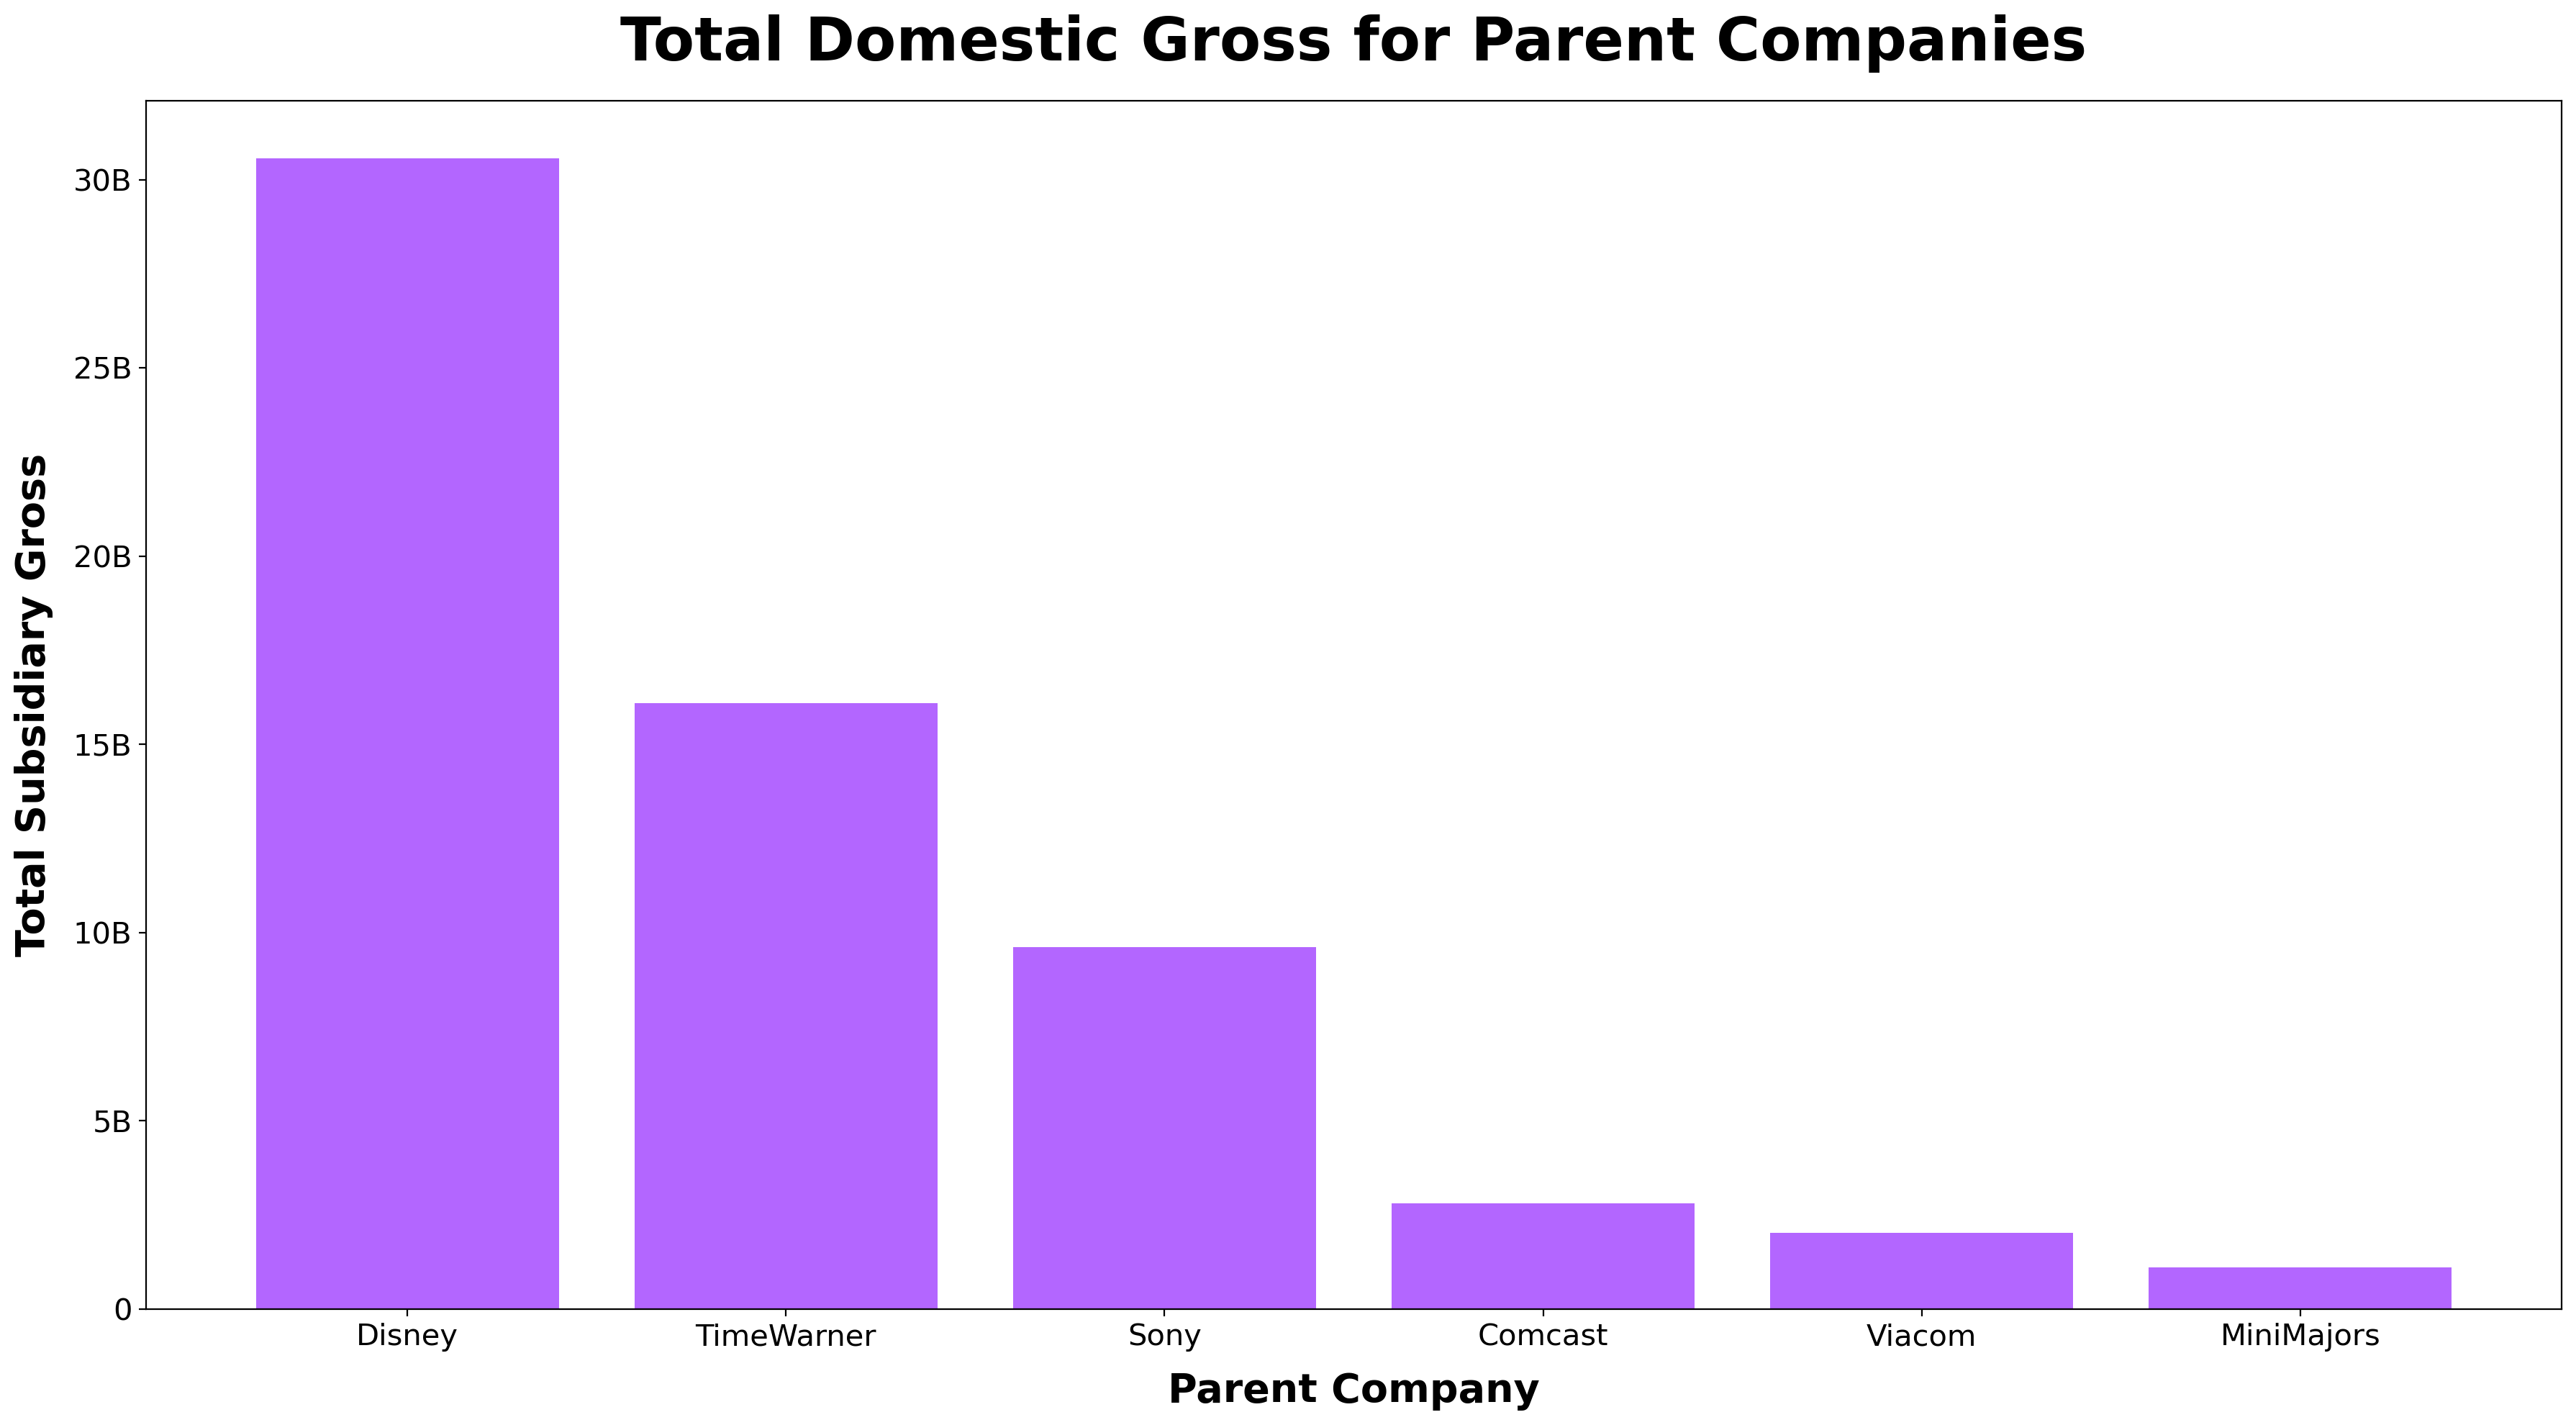

In [66]:
## Plot of total domestic gross per parent company (hard coded)
fig, ax = plt.subplots(figsize=(18,10), dpi=200)

n = ['Disney', 'TimeWarner', 'Sony', 'Comcast', 'Viacom', 'MiniMajors']
m = [Disney_df['domestic_gross'].sum(), TimeWarner_df['domestic_gross'].sum(),
     Sony_df['domestic_gross'].sum(), Comcast_df['domestic_gross'].sum(),  
     Viacom_df['domestic_gross'].sum(),  Mini_df['domestic_gross'].sum()]

plt.bar(n, m, color='#b366ff')
plt.xticks(ticks=n, labels=n, fontsize=15)
plt.yticks(ticks=[0,5000000000, 10000000000, 15000000000, 20000000000, 25000000000, 30000000000],
           labels=['0','5B', '10B', '15B', '20B', '25B', '30B'], fontsize=15)
ax.set_xlabel("Parent Company", fontsize=20, fontweight='bold', labelpad=10)
ax.set_ylabel("Total Subsidiary Gross", fontsize=20, fontweight='bold', labelpad=10)
ax.set_title("Total Domestic Gross for Parent Companies", fontsize=30, fontweight='bold', pad=20);

plt.tight_layout()

**Final Observations & Insights**
<ul>
    <li> Owning multiple studios that produce content yields incredible profits domestically. Microsoft should seek to acquire multiple production studios to create varied content.
    <li> The highest grossing films are all franchises (Marvel, Jurassic Park, Star Wars, etc). It is highly recommended that any action films made be based upon Microsoft franchises to avoid licensure/copyright fees.
</ul>

----

## Deja's Data Preparation & Analysis

In [ ]:
# Display dataframe
display(movie_type)
display(movie_type.info())

**Observations & Insights:**
<ul></ul>
<li>There are 26517 total entries with 0 missing values.
<li>The vote count needs to be reduced to a more relevant number and discard outliers like 1.
<li>Genre IDs need to be translated into genre names.
<li>There are lots of foreign films, and we are currently only interested in English-language films.
<li>There are duplicate titles.

In [ ]:
# Show when movies were released
movie_type.sort_values(by='release_date', ascending=False)

In [ ]:
## Filter for movies in English
movie_type = movie_type.loc[movie_type['original_language'] == "en"]

## Condense data to get most voted on movies
movie_type_data = movie_type.loc[movie_type['vote_count'] >= 10000]

In [ ]:
movie_type_data["genre_ids"].iloc[0]

In [ ]:
## Separate genre ids with multiple values
movie_type_data.genre_ids = movie_type_data.genre_ids.map(lambda x:eval(x))

In [ ]:
movie_type_data = movie_type_data.explode("genre_ids")

In [ ]:
## Filter out genres with few votes
movie_type_data= movie_type_data.loc[movie_type_data['genre_ids'] <= 878]
movie_type_data

In [ ]:
movie_type_data["genre_ids"].replace(
    {12: "Adventure",
     14: "Fantasy",
     16: "Animated",
     18: "Drama",
     27: "Horror",
     28: "Action",
     35: "Comedy",
     36: "History",
     37: "Western",
     53: "Thriller",
     80: "Crime",
     878: "Sci-fi"}, inplace=True)

In [ ]:
## Create a violin plot to display the relationship between vote averages and genres
sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x=movie_type_data["genre_ids"].astype("category"),
                y="vote_average",
                kind="violin", height=8,
                inner=None,
                data=movie_type_data)
sns.swarmplot(x=movie_type_data["genre_ids"].astype("category"), y="vote_average",
              color="k", size=3, data=movie_type_data, ax=g.ax)
g.set_xticklabels(rotation=45)
g.ax.set_title("Votes by Genre")
g.ax.set_ylabel("Vote Average")
g.ax.set_xlabel("Genre");

**Final Observations & Insights:**
<ul></ul>
<li>Focus of resources should be towards action, adventure, fantasy, sci-fi, comedy and animated movies.
<li>While animated has the highest rating, the other 5 categories have higher volumes of consumer interaction.

----

## James's Data Preparation & Analysis

In [ ]:
## Display dataframes
display(title_ratings)
display(title_basics)
display(title_akas)

In [ ]:
## Set tconst as index for joining 3 separate dataframes
title_ratings.set_index('tconst', inplace = True)
title_basics.set_index('tconst', inplace =True)

## Rename title_id to tconst to join this data frame into our main data frame
title_akas.rename(columns={'title_id':'tconst'}, inplace=True)
title_akas.set_index('tconst', inplace=True)

## Complete first join between title_ratings and title_basics
merged1 = title_ratings.join(title_basics, on='tconst', how='inner')

## Complete second join between the above result and title_akas
imdb_data = merged1.join(title_akas, on='tconst', how='inner')

## Since there are lots of missing data and irrelevant data, the data is filtered with only US region
imdb_US_movie = imdb_data[imdb_data['region'] == 'US'].copy()

## Sort in descending order
imdb_US_movie = imdb_US_movie.sort_values(by=['numvotes'], ascending=False).copy()

## Drop all duplicate titles from the dataframe
imdb_US_movie = imdb_US_movie.drop_duplicates(subset=['original_title'], keep ='first').copy()

## Filter out irrelevant columns in our dataframe
## Set the index to title
imdb_US_movie = imdb_US_movie.set_index('primary_title').copy()
imdb_US_movie = imdb_US_movie[['averagerating', 'numvotes', 'start_year', 'runtime_minutes', 'genres']].copy()
imdb_US_movie.head()

In [ ]:
mean = imdb_US_movie['numvotes'].mean()
median = imdb_US_movie['numvotes'].median()
print(f'mean is {mean} and median is {median}')

**Observations & Insights:**
<ul></ul>
<li>The mean vote counts is significantly larger than the median. This means the data is extremely skewed right.
<li>Therefore we will use the upper quantiles of this data since movies with lower ratings are not significant in our analysis

In [ ]:
## We will consider top 10 and top 1 percent of the data by vote counts
ten_percentile = imdb_US_movie['numvotes'].quantile(.90)
one_percentile = imdb_US_movie['numvotes'].quantile(.99)

print("top 10 percentile:", round(ten_percentile))
print("top 1 percentile:", round(one_percentile))

In [ ]:
## Movies filtered based on the top 10 percentile of vote counts
top_10_percent = imdb_US_movie[(imdb_US_movie['numvotes']>=5795)].reset_index().copy()

## Divide up multiple genres for a single movie into a separate row
top_10_percent.loc[:,('genres')] = top_10_percent.loc[:,('genres')].str.split(',')
top_10 = top_10_percent.explode('genres')

## Filter out top 5 genres of movie counts within the 10 percentile
genres_count_10_percent = pd.DataFrame(top_10['genres'].value_counts())
genres_count_10_percent = genres_count_10_percent.head()

## Create a table with average number of votes for top five movie genre counts
genres_avgvotes_10 = pd.DataFrame(top_10.groupby('genres')['numvotes'].mean().sort_values(ascending=False))
genres_avgvotes_10 = genres_avgvotes_10.reset_index()
genres_avgvotes_10 = genres_avgvotes_10[genres_avgvotes_10['genres'].isin(['Drama','Comedy','Action','Thriller','Adventure'])]
genres_avgvotes_10.set_index('genres', inplace=True)

## Join the movie counts and average number of votes by genre
top10 = genres_count_10_percent.join(genres_avgvotes_10)
top10.rename(columns={'genres':'movie counts'}, inplace=True)
top10 = top10.reset_index().rename(columns={'index':'movie genre'})
top10

In [ ]:
## Repeat all the steps above to gather top 1 percentile of number of votes
top_1_percent = imdb_US_movie[(imdb_US_movie['numvotes']>=223993)].reset_index().copy()
top_1_percent.loc[:,('genres')] = top_1_percent.loc[:,('genres')].str.split(',')
top_1 = top_1_percent.explode('genres')
genres_count_1percent = pd.DataFrame(top_1['genres'].value_counts())
genres_count_1 = genres_count_1percent.head()
genres_avgvotes_1 = pd.DataFrame(top_1.groupby('genres')['numvotes'].mean().sort_values(ascending=False))
genres_avgvotes_1 = genres_avgvotes_1.reset_index()
genres_avgvotes_1 = genres_avgvotes_1[genres_avgvotes_1['genres'].isin(['Drama','Comedy','Action','Sci-Fi','Adventure'])]
genres_avgvotes_1.set_index('genres', inplace=True)
top1 = genres_count_1.join(genres_avgvotes_1)
top1.rename(columns={'genres':'movie counts'}, inplace=True)
top1 = top1.reset_index().rename(columns={'index':'movie genre'})
top1

In [ ]:
## Two separate bar graphs of top 1 percentile(number of votes) movie genre data

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

fig, (ax1, ax2) = plt.subplots(figsize=(13,6), ncols=2, dpi=200)

x=top10['movie genre']
y=top10['movie counts']
y1=top10['numvotes']
clrs=['grey' if (x != 'Action' and x != 'Adventure') else 'red' for x in x]

sns.barplot(x=x, y=y, palette=clrs, ax=ax1)
ax1.set_title('Number of Movies in Each Genre', fontweight='bold', fontsize=15)
ax1.set_xlabel('Movie Genres', fontweight='bold', fontsize=12)
ax1.set_ylabel('Movie Counts', fontweight='bold', fontsize=12)
change_width(ax1, 0.7)

sns.barplot(x=x, y=y1, palette=clrs, ax=ax2)
ax2.set_title('Average Vote Counts', fontweight='bold', fontsize=15)
ax2.set_xlabel('Movie Genres', fontweight='bold', fontsize=12)
ax2.set_ylabel('Vote Counts', fontweight='bold', fontsize=12);
change_width(ax2, 0.7)

plt.subplots_adjust(wspace=.3)

fig.suptitle("Top Ten Percentile in Vote Counts", fontweight='bold', fontsize=20);

**Observations & Insights:**
<ul>
    <li> From the IMDB dataset, we have extracted the top ten quantiles of the movie rating vote counts.
    <li> Although drama and comedy movies are more prevalent in the top ten quantiles, action and adventure movies have much higher average vote counts.
    <li> This indicates that as we move up to the higher quantile in vote counts, the number of action and adventure movies grows.
</ul>

In [ ]:
## Two separate bar graphs of top 1 percentile(number of votes) movie genre data

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

fig, (ax1, ax2) = plt.subplots(figsize=(13,6), ncols=2, dpi=200)

xx=top1['movie genre']
yy=top1['movie counts']
y2=top1['numvotes']
clrs=['grey' if (x != 'Action' and x != 'Adventure') else 'red' for x in top1['movie genre']]

sns.barplot(x=xx, y=yy, palette=clrs, ax=ax1)
ax1.set_title('Number of Movies in Each Genre', fontweight='bold', fontsize=15)
ax1.set_xlabel('Movie Genres', fontweight='bold', fontsize=12)
ax1.set_ylabel('Movie Counts', fontweight='bold', fontsize=12)
change_width(ax1, 0.7)

sns.barplot(x=xx, y=y2, palette=clrs, ax=ax2)
ax2.set_title('Average Vote Counts', fontweight='bold', fontsize=15)
ax2.set_xlabel('Movie Genres', fontweight='bold', fontsize=12)
ax2.set_ylabel('Vote Counts', fontweight='bold', fontsize=12);
change_width(ax2, 0.7)

plt.subplots_adjust(wspace=.3)

fig.suptitle("Top One Percentile in Vote Counts", fontweight='bold', fontsize=20);

**Final Observations & Insights:**
<ul>
    <li> As seen in the previous graph, this top one quantile visualization confirms that as we move up to datas in the higher quantile, number of action and adventure movies increases.
    <li> Despite the fact that all the movies here in this data were in the top one percentile, adventure and action movies had second and third most average vote counts.

----

# Conclusions
<ul></ul>
<li>
<li>